1. Set Up Database

In [4]:
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db')
cursor = connection.cursor()

2. Create the Necessary Tables

In [8]:
# create students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

In [9]:
# create grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

3. Insert Data into the Tables

In [10]:
# list students data
students_data = [
    (1,"Alice","Johnson"),
    (2,"Bob","Smith"),
    (3,"Carol","White"),
    (4,"David","Brown"),
    (5,"Eve","Davis")
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', students_data)

# Commit the transaction
connection.commit()

In [11]:
# list grades data
grades_data = [
    (1,1,"Math",95),
    (2,1,"English",88),
    (3,1,"History",90),
    (4,2,"Math",82),
    (5,2,"English",76),
    (6,2,"History",85),
    (7,3,"Math",87),
    (8,3,"English",94),
    (9,3,"History",93),
    (10,4,"Math",85),
    (11,4,"English",87),
    (12,4,"History",89),
    (13,5,"Math",78),
    (14,5,"English",86),
    (15,5,"History",92)
]

# Insert data into the table
cursor.executemany('''
INSERT INTO grades (grade_id, student_id, subject, grade) VALUES (?, ?, ?, ?)
''', grades_data)

# Commit the transaction
connection.commit()

4. Perform SQL Queries

In [12]:
# Question 1: Retrieve all students' names and their grades
cursor.execute("SELECT students.first_name, students.last_name,grades.grade FROM students JOIN grades ON students.student_id=grades.student_id")
rows = cursor.fetchall()

# Print the results
print("All students and their grades:")
for row in rows:
    print(row)

All students and their grades:
('Alice', 'Johnson', 95)
('Alice', 'Johnson', 88)
('Alice', 'Johnson', 90)
('Bob', 'Smith', 82)
('Bob', 'Smith', 76)
('Bob', 'Smith', 85)
('Carol', 'White', 87)
('Carol', 'White', 94)
('Carol', 'White', 93)
('David', 'Brown', 85)
('David', 'Brown', 87)
('David', 'Brown', 89)
('Eve', 'Davis', 78)
('Eve', 'Davis', 86)
('Eve', 'Davis', 92)


In [13]:
# Question 2: Find the average grade for each student
cursor.execute("SELECT students.first_name, students.last_name, AVG(grades.grade) FROM grades JOIN students on grades.student_id=students.student_id GROUP BY students.first_name, students.last_name")
avg_rows = cursor.fetchall()

# Print the results
print("Average grade for each student:")
for row in avg_rows:
    print(row)

Average grade for each student:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 91.33333333333333)
('David', 'Brown', 87.0)
('Eve', 'Davis', 85.33333333333333)


In [19]:
# Question 3: Find the student with the highest average grade
cursor.execute("SELECT students.first_name, students.last_name, AVG(grades.grade) FROM grades JOIN students on grades.student_id=students.student_id GROUP BY students.first_name, students.last_name ORDER BY AVG(grades.grade) DESC LIMIT 1")
rows = cursor.fetchall()

# Print the results
print("Highest Average Grade:")
for row in rows:
    print(row)

Highest Average Grade:
('Carol', 'White', 91.33333333333333)


In [22]:
# Question 4: Find the average grade for the Math subject
cursor.execute("SELECT grades.subject, AVG(grades.grade) FROM grades WHERE grades.subject='Math'")
rows = cursor.fetchall()

# Print the results
print("Average Math Grade:")
for row in rows:
    print(row)

Average Math Grade:
('Math', 85.4)


In [24]:
# Question 5: List all the students who scored above 90 in any subject
cursor.execute("SELECT DISTINCT students.first_name, students.last_name FROM grades JOIN students on grades.student_id=students.student_id WHERE grades.grade>90")
rows = cursor.fetchall()

# Print the results
print("Student who scored above 90:")
for row in rows:
    print(row)

Student who scored above 90:
('Alice', 'Johnson')
('Carol', 'White')
('Eve', 'Davis')


5. Load Data into Pandas

In [27]:
import pandas as pd

# load students and grades tables into data frames and combine the two
student_grades = pd.read_sql("SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students JOIN grades on students.student_id=grades.student_id", connection)
print(student_grades.head())

  first_name last_name  subject  grade
0      Alice   Johnson     Math     95
1      Alice   Johnson  English     88
2      Alice   Johnson  History     90
3        Bob     Smith     Math     82
4        Bob     Smith  English     76


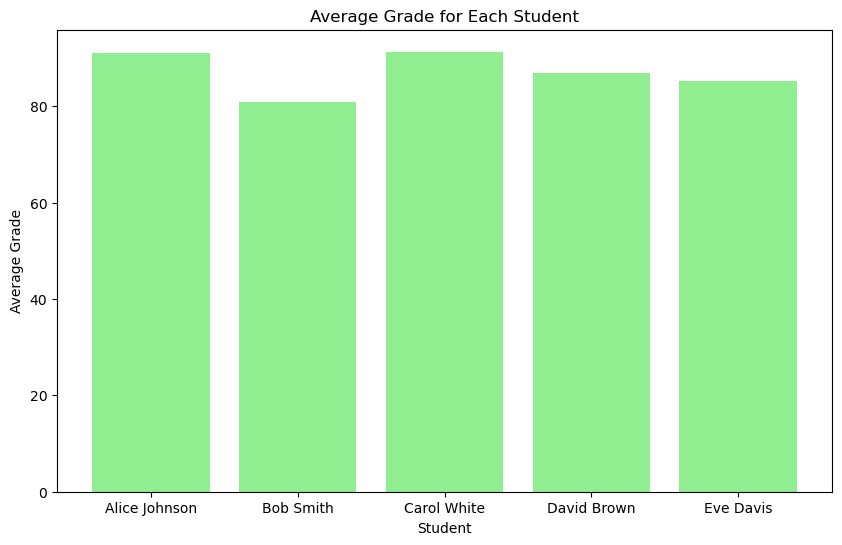

In [52]:
import matplotlib.pyplot as plt

# calculate the average grade for each student and put in data frame 
cursor.execute("SELECT students.first_name, students.last_name, AVG(grades.grade) FROM grades JOIN students on grades.student_id=students.student_id GROUP BY students.first_name, students.last_name")
avg_rows = cursor.fetchall()

avg_grades = pd.DataFrame(avg_rows, columns=['First',"Last","Average Grade"])
avg_grades['Student']=avg_grades["First"]+' '+avg_grades['Last']

# plot the average grade for each student
plt.figure(figsize=(10,6))
plt.bar(avg_grades['Student'],avg_grades['Average Grade'], color="lightgreen")
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title("Average Grade for Each Student")
plt.show()

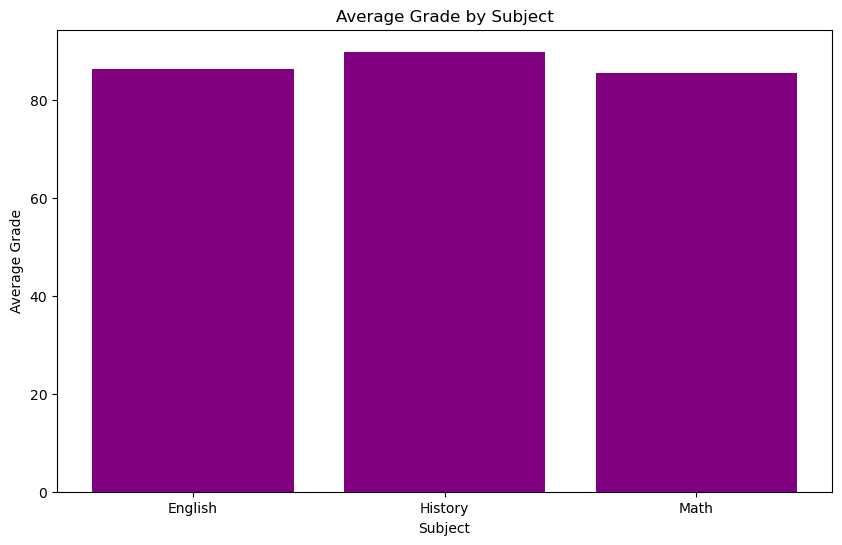

In [72]:
# calculate the average grade for each subject and put in data frame 
cursor.execute("SELECT grades.subject, AVG(grades.grade) FROM grades GROUP BY grades.subject")
sub_rows = cursor.fetchall()

avg_sub = pd.DataFrame(sub_rows, columns=["Subject","Average Grade"])

# plot the average grade for each subject
plt.figure(figsize=(10,6))
plt.bar(avg_sub['Subject'],avg_sub['Average Grade'], color="purple")
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title("Average Grade by Subject")
plt.show()

In [73]:
cursor.close()